In [68]:
import pandas as pd
import numpy as np

df = pd.read_csv('./DirectMail.txt', sep='\t', engine='python')
df.head()

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,resp,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,...,0,0,1,0,0,1,1,0,0,1
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,...,0,0,1,0,0,1,0,0,0,2
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,...,0,0,1,0,0,1,1,0,0,3
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,...,0,1,1,0,0,1,1,0,0,4
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,...,0,1,1,0,0,1,1,0,0,5


- AGE: Age of the customer (in years).
- CRED: Credit Score of the customer.
- MS: Marital Status (the specific encoding isn't provided, but likely represents different marital statuses).
- HEQ: Home Equity as a percentage.
- INCOME: Income of the customer (possibly in thousands or other unit, but not specified).
- DEPC: Depreciation indicator (Y/N) - likely indicates whether the customer has a depreciating asset.
- MOB: Existing customer indicator (Y/N) - indicates whether the person is an existing customer.
- MILEAGE: Car Mileage, potentially representing the mileage of the customer's vehicle.
- RESTYPE: Real Estate Type, likely categorizing the type of residence (e.g., HOME, CONDO, etc.).
- GENDER: Gender of the customer (M for Male, F for Female).
- EMP_STA: Employer Status, possibly indicating different employment types or conditions.
- RES_STA: Residential Status, likely reflecting the stability or type of residence.
- DELINQ: Delinquency Status, indicating if the customer has a history of delinquency (e.g., late payments).
- NUMTR: Number of active trades, possibly representing the number of active credit lines or trades.
- MRTGI: Mortgage Indicator (Y/N), indicating if the customer has a mortgage.
- MFDU: Multiple Family Dwelling Unit indicator, possibly indicating if the customer lives in a multifamily unit.
- resp: Response indicator (Y/N), indicating if the customer responded to a marketing campaign.
- female: Female indicator, a binary flag that seems redundant given the GENDER column.
- HOME: Home Indicator (Y/N), showing if the customer owns a home.
- CONDO: Condominium Indicator (Y/N), indicating if the customer lives in a condo.
- COOP: Co-Op Residence Indicator (Y/N), indicating if the customer lives in a cooperative housing unit.
- renter: Rental Home Indicator (Y/N), indicating if the customer rents their residence.
- emp1: Likely an employment-related feature, but the specific meaning isn't clear from the provided data.
- emp2: Another employment-related feature with unclear specifics.
- msn: Medical Safety Net Program (Y/N), indicating if the customer is part of a medical safety net program.
- cuscode: Customer Identification Code, a unique identifier for each customer.

In [69]:
df['MS'] = df['MS'].astype('category')
df['DEPC'] = df['DEPC'].astype('category')
df['MOB'] = df['MOB'].astype('category')
df['RESTYPE'] = df['RESTYPE'].astype('category')
df['GENDER'] = df['GENDER'].astype('category')
df['EMP_STA'] = df['EMP_STA'].astype('category')
df['RES_STA'] = df['RES_STA'].astype('category')
df['MRTGI'] = df['MRTGI'].astype('category')
df['renter'] = df['renter'].astype('boolean')
df['MS'] = df['MS'].astype('category')
df['MS'] = df['MS'].astype('category')
df['CRED'].fillna(df['CRED'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29904 entries, 0 to 29903
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   AGE      29904 non-null  int64   
 1   CRED     29904 non-null  float64 
 2   MS       29904 non-null  category
 3   HEQ      29904 non-null  float64 
 4   INCOME   29904 non-null  int64   
 5   DEPC     29904 non-null  category
 6   MOB      29904 non-null  category
 7   MILEAGE  29904 non-null  float64 
 8   RESTYPE  29904 non-null  category
 9   GENDER   29904 non-null  category
 10  EMP_STA  29904 non-null  category
 11  RES_STA  29904 non-null  category
 12  DELINQ   29904 non-null  int64   
 13  NUMTR    29904 non-null  int64   
 14  MRTGI    29904 non-null  category
 15  MFDU     29904 non-null  int64   
 16  resp     29904 non-null  int64   
 17  female   29904 non-null  int64   
 18  HOME     29904 non-null  int64   
 19  CONDO    29904 non-null  int64   
 20  COOP     29904 non-null  int

C:\Users\thega\AppData\Local\Temp\ipykernel_33112\1631551852.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRED'].fillna(df['CRED'].mean(), inplace=True)


In [70]:
df.describe()

,AGE,CRED,HEQ,INCOME,MILEAGE,DELINQ,NUMTR,MFDU,resp,female,HOME,CONDO,COOP,emp1,emp2,msn,cuscode
count,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000,29904.000000
mean,49.300361,603.627364,38.328892,41.360688,11.803395,0.766152,0.763343,0.452749,0.095539,0.422285,0.547251,0.018927,0.029595,0.907772,0.059858,0.575876,14952.500000
std,15.546298,98.082496,37.205701,15.441137,5.744523,1.140847,1.143284,0.497771,0.293963,0.493932,0.497771,0.136270,0.169469,0.289353,0.237228,0.494218,8632.685561
min,18.000000,300.000000,0.100000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,574.000000,10.000000,30.000000,7.775750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7476.750000
50%,50.000000,617.000000,30.000000,40.000000,12.536500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,14952.500000
75%,61.000000,652.000000,50.000000,50.000000,16.193250,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22428.250000
max,90.000000,1789.000000,200.000000,110.000000,94.640000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29904.000000


In [71]:
from sklearn.preprocessing import OneHotEncoder

curated_df = df.drop(columns=['cuscode', 'resp'])
curated_df.count

<bound method DataFrame.count of        AGE    CRED MS   HEQ  INCOME DEPC MOB  MILEAGE RESTYPE GENDER  ...  \
0       20   543.0  U   0.1      20    N   Y   14.418    HOME      M  ...   
1       18   445.0  U   0.1      20    N   Y    0.311    HOME      M  ...   
2       19   423.0  U   0.1      20    N   N   17.876    HOME      M  ...   
3       18   416.0  X   0.1      20    N   Y   17.084    HOME      F  ...   
4       18   522.0  U   0.1      20    Y   Y   16.510    HOME      F  ...   
...    ...     ... ..   ...     ...  ...  ..      ...     ...    ...  ...   
29899   56  1789.0  M  30.0      30    Y   Y   17.302    COOP      F  ...   
29900   58  1789.0  U  30.0      40    Y   N   10.509    HOME      M  ...   
29901   64  1789.0  M  30.0      40    Y   N    4.749  RENTER      F  ...   
29902   64  1789.0  M  30.0      40    Y   Y   11.110    HOME      F  ...   
29903   68  1789.0  M  90.0      40    N   Y   18.653    HOME      M  ...   

      MRTGI MFDU  female  HOME CONDO  COOP

In [72]:

# Identify categorical columns to be encoded
categorical_cols = ['MS', 'DEPC', 'MOB', 'RESTYPE', 'GENDER', 'EMP_STA', 'RES_STA', 'MRTGI', 'renter']

# Apply OneHotEncoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(curated_df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
encoded_features.count


<bound method DataFrame.count of        MS_U  MS_X  DEPC_Y  MOB_Y  RESTYPE_COOP  RESTYPE_HOME  RESTYPE_RENTER  \
0       1.0   0.0     0.0    1.0           0.0           1.0             0.0   
1       1.0   0.0     0.0    1.0           0.0           1.0             0.0   
2       1.0   0.0     0.0    0.0           0.0           1.0             0.0   
3       0.0   1.0     0.0    1.0           0.0           1.0             0.0   
4       1.0   0.0     1.0    1.0           0.0           1.0             0.0   
...     ...   ...     ...    ...           ...           ...             ...   
29899   0.0   0.0     1.0    1.0           1.0           0.0             0.0   
29900   1.0   0.0     1.0    0.0           0.0           1.0             0.0   
29901   0.0   0.0     1.0    0.0           0.0           0.0             1.0   
29902   0.0   0.0     1.0    1.0           0.0           1.0             0.0   
29903   0.0   0.0     0.0    1.0           0.0           1.0             0.0   

      

In [73]:



# Combine the encoded features with the original dataframe (excluding original categorical columns)
df_encoded = pd.concat([curated_df.drop(columns=categorical_cols), encoded_features], axis=1)
df_encoded.count


<bound method DataFrame.count of        AGE    CRED   HEQ  INCOME  MILEAGE  DELINQ  NUMTR  MFDU  female  HOME  \
0       20   543.0   0.1      20   14.418       0      2     0       0     1   
1       18   445.0   0.1      20    0.311       2      2     0       0     1   
2       19   423.0   0.1      20   17.876       1      0     0       0     1   
3       18   416.0   0.1      20   17.084       0      0     0       1     1   
4       18   522.0   0.1      20   16.510       1      0     0       1     1   
...    ...     ...   ...     ...      ...     ...    ...   ...     ...   ...   
29899   56  1789.0  30.0      30   17.302       1      0     1       1     0   
29900   58  1789.0  30.0      40   10.509       0      0     0       0     1   
29901   64  1789.0  30.0      40    4.749       0      3     1       1     0   
29902   64  1789.0  30.0      40   11.110       0      0     0       1     1   
29903   68  1789.0  90.0      40   18.653       1      1     0       0     1   

      

In [74]:

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

                     AGE      CRED       HEQ    INCOME   MILEAGE    DELINQ  \
AGE             1.000000  0.187207  0.260655  0.050044 -0.002332 -0.001819   
CRED            0.187207  1.000000  0.067768  0.016983 -0.004872 -0.001678   
HEQ             0.260655  0.067768  1.000000 -0.020169 -0.007958  0.002774   
INCOME          0.050044  0.016983 -0.020169  1.000000  0.003891 -0.009672   
MILEAGE        -0.002332 -0.004872 -0.007958  0.003891  1.000000 -0.000109   
DELINQ         -0.001819 -0.001678  0.002774 -0.009672 -0.000109  1.000000   
NUMTR           0.001631  0.005559 -0.000182  0.008713  0.002687 -0.008818   
MFDU            0.005576  0.001623  0.005543  0.001426  0.002670 -0.009241   
female         -0.006071  0.006492  0.004828  0.000163 -0.012192  0.002851   
HOME           -0.005576 -0.001623 -0.005543 -0.001426 -0.002670  0.009241   
CONDO          -0.003725  0.000548  0.001662 -0.002545 -0.003889 -0.003795   
COOP           -0.007461  0.005717 -0.001219 -0.004271 -0.002034

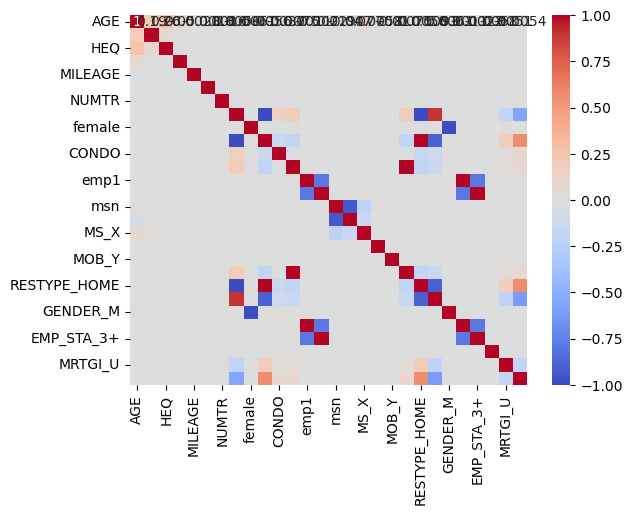

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

y = df['resp']
print(y.count)


<bound method Series.count of 0        0
1        0
2        0
3        0
4        0
        ..
29899    0
29900    0
29901    0
29902    0
29903    0
Name: resp, Length: 29904, dtype: int64>


In [77]:
print(df_encoded.count)


<bound method DataFrame.count of        AGE    CRED   HEQ  INCOME  MILEAGE  DELINQ  NUMTR  MFDU  female  HOME  \
0       20   543.0   0.1      20   14.418       0      2     0       0     1   
1       18   445.0   0.1      20    0.311       2      2     0       0     1   
2       19   423.0   0.1      20   17.876       1      0     0       0     1   
3       18   416.0   0.1      20   17.084       0      0     0       1     1   
4       18   522.0   0.1      20   16.510       1      0     0       1     1   
...    ...     ...   ...     ...      ...     ...    ...   ...     ...   ...   
29899   56  1789.0  30.0      30   17.302       1      0     1       1     0   
29900   58  1789.0  30.0      40   10.509       0      0     0       0     1   
29901   64  1789.0  30.0      40    4.749       0      3     1       1     0   
29902   64  1789.0  30.0      40   11.110       0      0     0       1     1   
29903   68  1789.0  90.0      40   18.653       1      1     0       0     1   

      

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5391
           1       0.10      0.11      0.11       590

    accuracy                           0.81      5981
   macro avg       0.50      0.50      0.50      5981
weighted avg       0.82      0.81      0.82      5981

Matriz de Confusión:
[[4779  612]
 [ 523   67]]


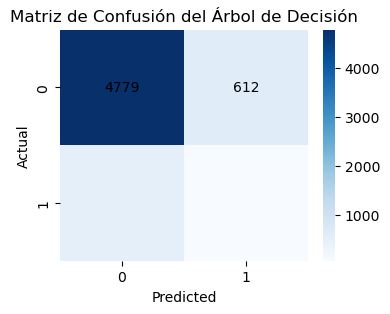

In [78]:

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Inicializamos y entrenamos el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Reporte de performance del modelo
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={'color': 'black'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Árbol de Decisión')
plt.show()

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5391
           1       0.00      0.00      0.00       590

    accuracy                           0.90      5981
   macro avg       0.45      0.50      0.47      5981
weighted avg       0.81      0.90      0.85      5981

Matriz de Confusión:
[[5391    0]
 [ 590    0]]


c:\Users\thega\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thega\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thega\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


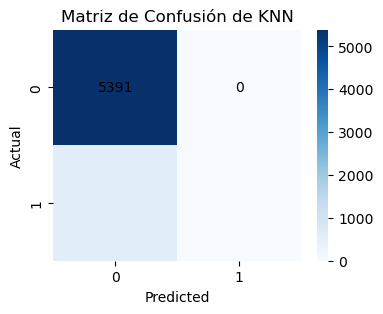

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializamos y entrenamos el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)  # Es el mejor N que pude encontrar
knn_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Reporte de performance del modelo
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={'color': 'black'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión de KNN')
plt.show()